# Importing The Libraries

In [3]:
import cv2
import numpy as np
import pandas as pd
import zipfile

import tensorflow as tf
print(tf.__version__)

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")

2.8.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/Deep_Learning/Face_Recognation/Material.zip"
zipfile = zipfile.ZipFile(file = path, mode = "r")
zipfile.extractall("./")
zipfile.close()

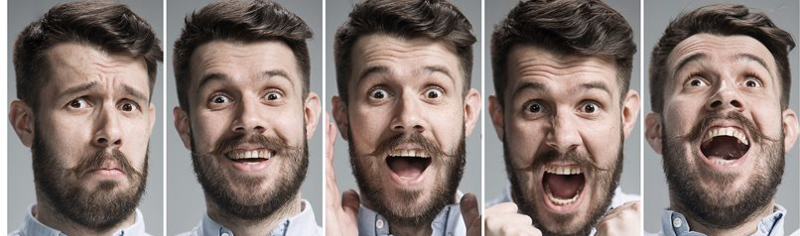

In [7]:
img = cv2.imread("/content/Material/testes/teste01.png")
cv2_imshow(img)

# Testing The Detector

## Loading The Models

In [11]:
cascade_faces = "/content/Material/haarcascade_frontalface_default.xml"
model_path = "/content/Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
emotion_classifier = tf.keras.models.load_model(model_path, compile = False)
expressions = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Neutral"]

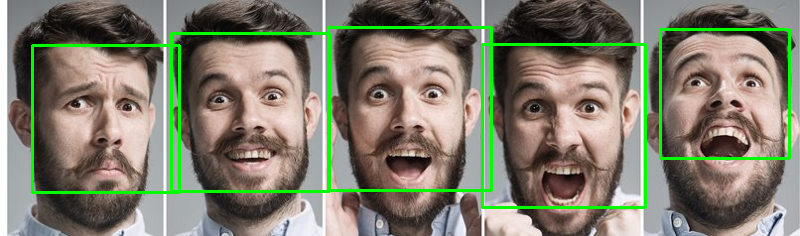

In [15]:
org = img.copy()
faces = face_detection.detectMultiScale(org,scaleFactor = 1.1,
                                        minNeighbors = 3,
                                        minSize = (20,20))
for face in faces:
    x,y,w,h = face
    cv2.rectangle(org,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(org)

# Extracting ROI (Region of Interest)


In [17]:
img = cv2.imread("/content/Material/testes/teste_gabriel.png")
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
img.shape,gray_img.shape

((300, 400, 3), (300, 400))

Shape :  (128, 128)


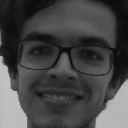

In [20]:
faces = face_detection.detectMultiScale(gray_img,scaleFactor = 1.1,minNeighbors = 2,minSize = (20,20))
for face in faces:
    x,y,w,h = face
    roi = gray_img[y:y+h,x:x+w]

print("Shape : ", roi.shape)
cv2_imshow(roi)

Shape :  (48, 48)


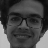

In [21]:
roi = cv2.resize(roi, (48,48))
print("Shape : ",roi.shape)
cv2_imshow(roi)

In [22]:
roi.dtype

dtype('uint8')

In [23]:
roi = roi.astype("float")
roi.dtype

dtype('float64')

In [24]:
print("Max Value : ", roi.max())
print("Min Value : ", roi.min())

Max Value :  200.0
Min Value :  10.0


In [25]:
roi = roi / 255
print("Max Value : ", roi.max())
print("Min Value : ", roi.min())

Max Value :  0.7843137254901961
Min Value :  0.0392156862745098


In [28]:
print("Before Shape : ",roi.shape)
roi = tf.keras.preprocessing.image.img_to_array(roi)
print("After Shape : ",roi.shape)

Before Shape :  (48, 48, 1)
After Shape :  (48, 48, 1)


In [29]:
roi = np.expand_dims(roi ,axis = 0)
print("Shape : ",roi.shape)

Shape :  (1, 48, 48, 1)


# Predictions

In [37]:
preds = emotion_classifier.predict(roi)[0]
preds

array([1.6802143e-05, 5.7679888e-09, 1.1206589e-05, 9.9066460e-01,
       1.8033772e-05, 1.8518298e-05, 9.2708217e-03], dtype=float32)

In [38]:
len(preds)

7

In [40]:
emotion_probability = np.max(preds)
emotion_probability

0.9906646

In [41]:
preds.argmax()

3

In [42]:
label = expressions[preds.argmax()]
label

'Happy'

# Results

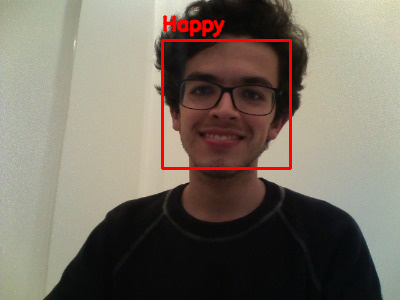

In [44]:
cv2.putText(img, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(img, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(img)

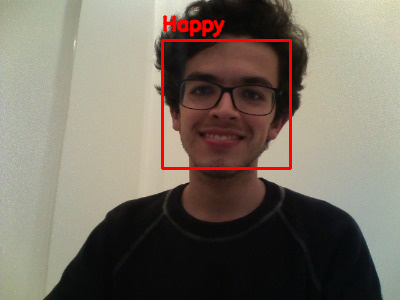

In [51]:
img = cv2.imread("/content/Material/testes/teste_gabriel.png")
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
faces = face_detection.detectMultiScale(gray_img,scaleFactor = 1.1,minNeighbors = 2,minSize = (20,20))
for face in faces:
    x,y,w,h = face
    roi = gray_img[y:y+h,x:x+w]

roi = cv2.resize(roi, (48,48))
roi = roi.astype("float")
roi = roi / 255
roi = tf.keras.preprocessing.image.img_to_array(roi)
roi = np.expand_dims(roi ,axis = 0)
preds = emotion_classifier.predict(roi)[0]
emotion_probability = np.max(preds)
label = np.argmax(preds)
label = expressions[label]

cv2.putText(img, label, (162, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(img, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2)
cv2_imshow(img)

In [61]:
probability = np.ones((250,300,3), dtype= 'uint8') * 255
print("Shape :", probability.shape)
#cv2_imshow(probability)

Shape : (250, 300, 3)


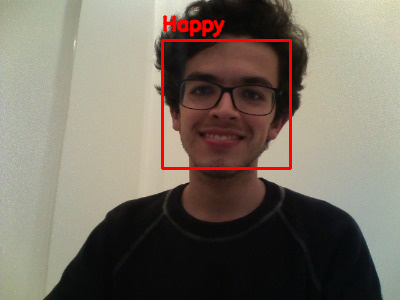

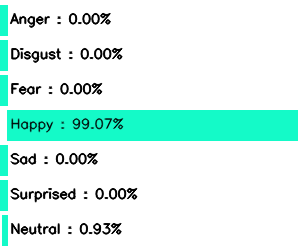

In [65]:
cv2_imshow(img)
if len(faces) == 1:
    for (i, (emotion,prob)) in enumerate(zip(expressions,preds)):
        #print(i,emotion,prob)
        text = "{} : {:.2f}%".format(emotion, prob*100)
        w = int(prob * 300)
        cv2.rectangle(probability, (7, (i * 35) + 5), (w, (i * 35) + 35),(200,250,20),-1)
        cv2.putText(probability,text, (10,(i*35) +23), cv2.FONT_HERSHEY_SIMPLEX,0.45,(0,0,0),1,cv2.LINE_AA)
cv2_imshow(probability)

# Multi Face 

## Display Final Result

Notice that in the final result some faces were not detected by haarscascade. To solve it, you can make adjustments to the parameters in the methoddetectMultiScale

In the last image, the algorithm detected two faces. Adjustments could also be made to the parameters or use Dlib for face detection, which is a library with better results.

In [71]:
cascade_faces = "/content/Material/haarcascade_frontalface_default.xml"
model_path = "/content/Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
emotion_classifier = tf.keras.models.load_model(model_path, compile = False)
expressions = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Neutral"]

img = cv2.imread("/content/Material/testes/teste03.jpg")
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
faces = face_detection.detectMultiScale(gray_img,scaleFactor = 1.2,minNeighbors = 5,minSize = (20,20))

for face in faces:
    x,y,w,h = face
    roi = gray_img[y:y+h,x:x+w]

    roi = cv2.resize(roi, (48,48))
    roi = roi.astype("float")
    roi = roi / 255
    roi = tf.keras.preprocessing.image.img_to_array(roi)
    roi = np.expand_dims(roi ,axis = 0)

    preds = emotion_classifier.predict(roi)[0]
    emotion_probability = np.max(preds)
    label = np.argmax(preds)
    label = expressions[label]

    cv2.putText(img,label,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.65,(0,0,255),2,cv2.LINE_AA)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

# Webcam

In [72]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""

def take_picture(filename='photo.jpg', quality=2, size=(400,300)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

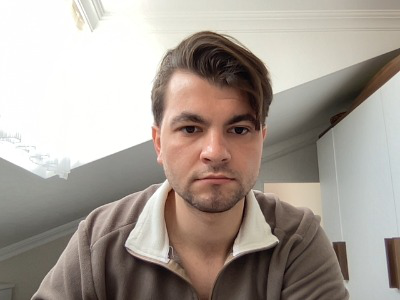

True

In [74]:
import os

path_imwrite = "/content/drive/MyDrive/Deep_Learning/Face_Recognation/"
image = take_picture()
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2_imshow(img)
cv2.imwrite(os.path.join(path_imwrite,"test.jpg"),img)

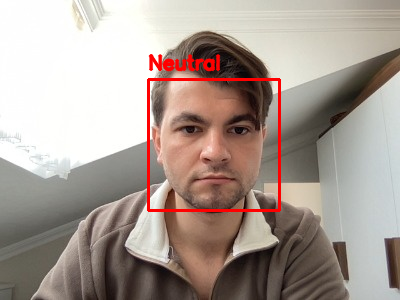

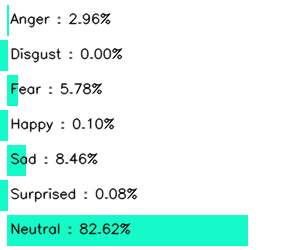

In [79]:
cascade_faces = "/content/Material/haarcascade_frontalface_default.xml"
model_path = "/content/Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_faces)
emotion_classifier = tf.keras.models.load_model(model_path, compile = False)
expressions = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Neutral"]

img = cv2.imread(os.path.join(path_imwrite,"test.jpg"))
faces = face_detection.detectMultiScale(img,scaleFactor=1.1,minNeighbors = 3, minSize = (20,20))
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

if len(faces) > 0 :
    for x,y,w,h in faces:
        roi = gray_img[y:y+h,x:x+w]
        roi = cv2.resize(roi,(48,48))
        roi = roi.astype("float") / 255.0
        roi = tf.keras.preprocessing.image.img_to_array(roi)
        roi = np.expand_dims(roi,axis = 0)

        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = expressions[preds.argmax()]
        cv2.putText(img,label,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.65,(0,0,255),2,cv2.LINE_AA)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
else:
    print("No Face Detections")

cv2_imshow(img)

probability = np.ones((250, 300, 3), dtype="uint8") * 255
if len(faces) == 1:
    for (i,(emotion,prob)) in enumerate(zip(expressions,preds)):
        text = "{} : {:.2f}%".format(emotion,prob*100)
        w = int(prob*300)
        cv2.rectangle(probability, (7, (i * 35) + 5),(w, (i * 35) + 35), (200, 250, 20), -1)
        cv2.putText(probability, text, (10, (i * 35) + 23),cv2.FONT_HERSHEY_SIMPLEX, 0.45,(0, 0, 0), 1, cv2.LINE_AA)

    cv2_imshow(probability)

cv2.imwrite(os.path.join(path_imwrite,"test_predictions.jpg"),img)
cv2.destroyAllWindows()